## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
# sonar dataset
url='http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
df_sonar=pd.read_csv(url, header=None)
df_sonar.name='sonar'

## 3. Summarize the Dataset

In [3]:
# peek at the data
df_sonar.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [4]:
# dimensions of the dataset
df_sonar.shape

(208, 61)

In [5]:
# data types
df_sonar.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [6]:
# statistical summary
pd.set_option('precision', 3) #change precision to 3 places
df_sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


the data has the same range, but different mean values -> maybe to standardize data

In [7]:
# class distribution
df_sonar.groupby(60).size()
#df_sonar.target.value_counts()

60
M    111
R     97
dtype: int64

We can see that each class hasn't the same number of instances.

In [8]:
# pairwise Pearson correlations
df_sonar.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000,0.736,0.572,0.491,3.448e-01,0.239,0.261,0.356,0.353,0.318,...,2.544e-01,0.355,3.117e-01,0.322,3.121e-01,0.221,0.314,0.368,0.357,0.347
1,0.736,1.000,0.780,0.607,4.197e-01,0.332,0.279,0.335,0.317,0.271,...,3.205e-01,0.435,3.461e-01,0.384,3.802e-01,0.262,0.280,0.353,0.352,0.359
2,0.572,0.780,1.000,0.782,5.461e-01,0.346,0.190,0.238,0.253,0.220,...,2.381e-01,0.394,3.329e-01,0.367,2.897e-01,0.288,0.381,0.334,0.425,0.374
3,0.491,0.607,0.782,1.000,7.269e-01,0.353,0.246,0.247,0.247,0.238,...,1.747e-01,0.375,3.648e-01,0.334,2.850e-01,0.281,0.340,0.345,0.420,0.401
4,0.345,0.420,0.546,0.727,1.000e+00,0.597,0.335,0.204,0.178,0.183,...,1.159e-01,0.267,3.150e-01,0.205,1.965e-01,0.199,0.219,0.239,0.291,0.254
5,0.239,0.332,0.346,0.353,5.971e-01,1.000,0.703,0.472,0.328,0.289,...,1.718e-01,0.252,1.624e-01,0.164,1.335e-01,0.167,0.161,0.204,0.221,0.178
6,0.261,0.279,0.190,0.246,3.354e-01,0.703,1.000,0.676,0.471,0.425,...,1.842e-01,0.144,4.640e-02,0.163,1.955e-01,0.174,0.186,0.243,0.184,0.222
7,0.356,0.335,0.238,0.247,2.040e-01,0.472,0.676,1.000,0.779,0.653,...,2.607e-01,0.219,1.024e-01,0.234,2.396e-01,0.277,0.267,0.288,0.194,0.146
8,0.353,0.317,0.253,0.247,1.779e-01,0.328,0.471,0.779,1.000,0.877,...,1.749e-01,0.208,1.054e-01,0.203,1.793e-01,0.233,0.194,0.232,0.097,0.095
9,0.318,0.271,0.220,0.238,1.832e-01,0.289,0.425,0.653,0.877,1.000,...,1.671e-01,0.166,9.754e-02,0.147,1.753e-01,0.152,0.140,0.212,0.058,0.097


In [9]:
# Skew for each attribute
df_sonar.drop(columns=60).skew() #positive (right) or negative (left) skew

0     2.131
1     2.156
2     2.653
3     3.402
4     2.018
5     1.248
6     0.971
7     1.481
8     1.634
9     1.281
10    0.988
11    0.589
12    0.737
13    1.022
14    0.764
15    0.695
16    0.654
17    0.526
18    0.283
19   -0.085
20   -0.253
21   -0.392
22   -0.594
23   -0.692
24   -0.789
25   -0.672
26   -0.628
27   -0.615
28   -0.442
29   -0.132
30    0.260
31    0.313
32    0.424
33    0.563
34    0.592
35    0.620
36    0.677
37    1.033
38    0.909
39    0.861
40    0.864
41    0.860
42    0.909
43    1.235
44    1.367
45    1.707
46    1.790
47    1.278
48    1.273
49    1.762
50    2.716
51    2.094
52    1.061
53    1.093
54    1.790
55    1.781
56    1.653
57    2.098
58    1.738
59    2.776
dtype: float64

## 4. Data Visualization

### a. Univariate Plots

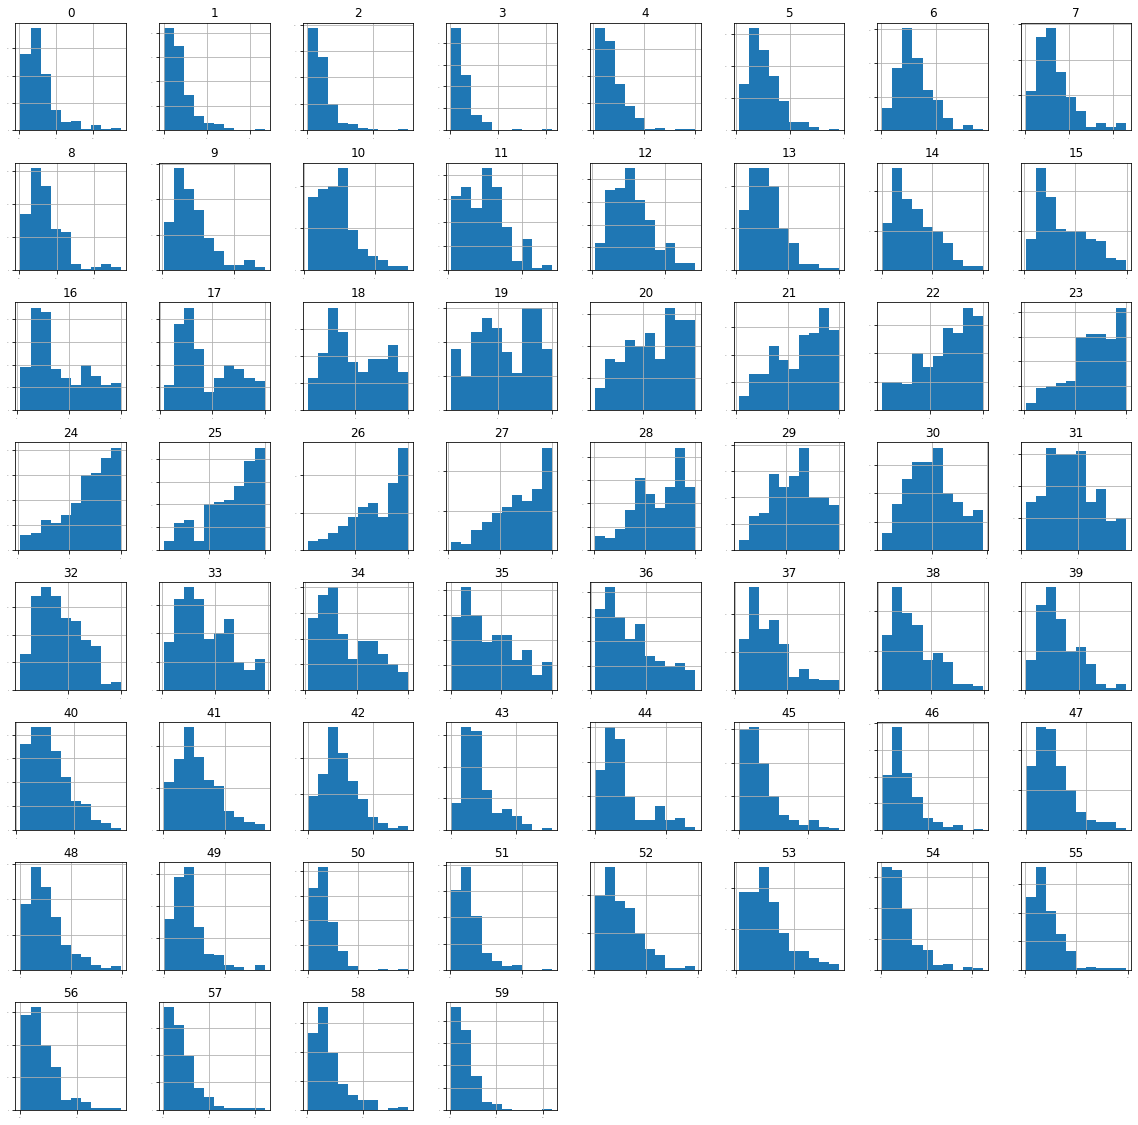

In [10]:
# histograms
df_sonar.drop(columns=60).hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,figsize=(20,20))
plt.show()

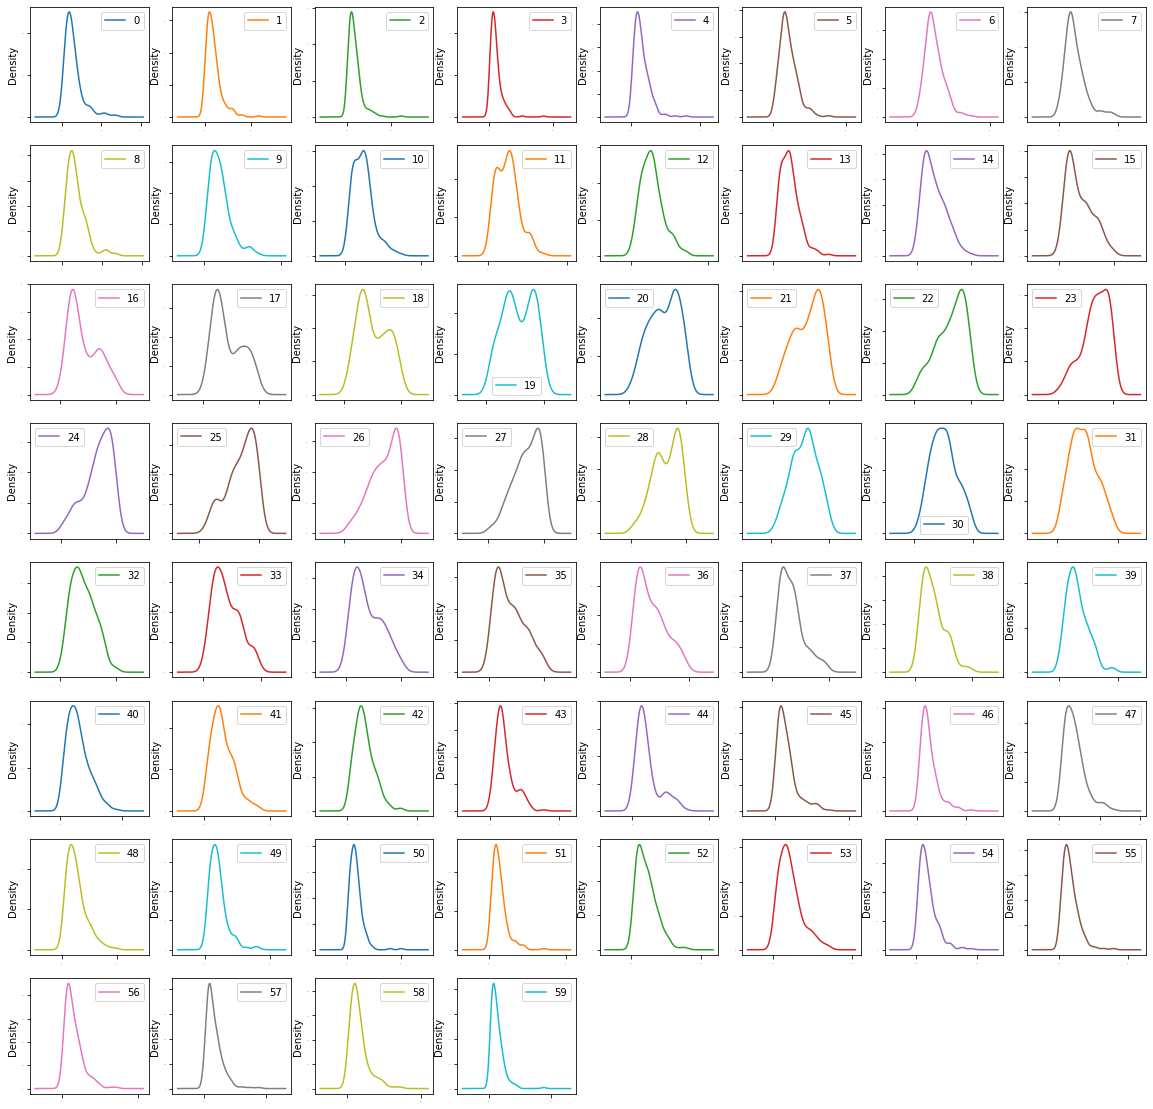

In [11]:
# density
df_sonar.drop(columns=60).plot(kind='density', subplots=True, layout=(8,8), sharex=False,sharey=False, fontsize=1, figsize=(20,20))
plt.show()

There are a lot of Gaussian-like distributions and perhaps some exponential-like distributions for other attributes.

### b. Multivariate Plots

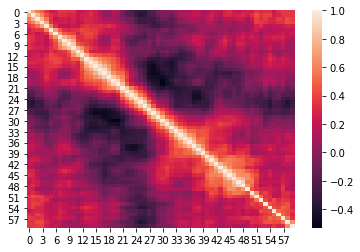

In [12]:
# correlation 
sns.heatmap(df_sonar.corr())

## 5. Split the data

In [13]:
#from sklearn.model_selection import train_test_split

X = df_sonar.iloc[:,0:60].values
y = df_sonar.iloc[:,60].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

## 6. Evaluate Algorithms

In [14]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score


# Spot-Check Algorithms

models = []
models.append(('LOG', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOG: 0.747059 (+/- 0.080309)
LDA: 0.704779 (+/- 0.128024)
KNN: 0.764706 (+/- 0.073860)
CART: 0.729779 (+/- 0.117408)
NB: 0.692279 (+/- 0.111562)
SVM: 0.771324 (+/- 0.099493)


We can see that it looks like KNN and SVM have the largest estimated accuracy score. 

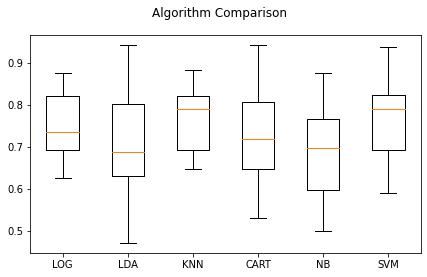

In [15]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(7,4)
plt.show()

It is possible that the varied distribution of the attributes is having an effect on the accuracy of algorithms (the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms). Let's evaluate the same algorithms with a standardized copy of the dataset.

In [16]:
#Standardize the dataset

#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler


# Spot-Check Algorithms

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

KNeighborsClassifier()
# evaluate each model in turn

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.716176 (+/- 0.131346)
ScaledLDA: 0.704779 (+/- 0.128024)
ScaledKNN: 0.778676 (+/- 0.116618)
ScaledCART: 0.735662 (+/- 0.082495)
ScaledNB: 0.692279 (+/- 0.111562)
ScaledSVM: 0.824632 (+/- 0.070681)


KNN is still doing well, even better than before and we can also see that the standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

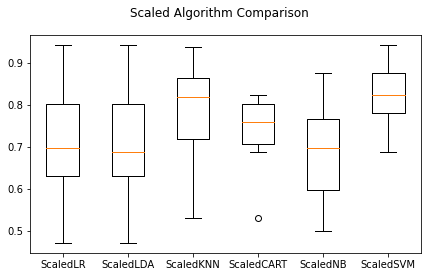

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(7,4)
plt.show()

The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that conguration beyond the default may yield even more accurate models.

## 7. Improve Results

### Tuning KNN

In [18]:
#from sklearn.model_selection import GridSearchCV

# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,30))
#p=[1,2]
#param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)


model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (+/- %f) with: %r" % (mean, stdev, param))

Best: 0.844118 using {'n_neighbors': 1}
0.844118 (+/- 0.087947) with: {'n_neighbors': 1}
0.819118 (+/- 0.071702) with: {'n_neighbors': 3}
0.766176 (+/- 0.113032) with: {'n_neighbors': 5}
0.765809 (+/- 0.116655) with: {'n_neighbors': 7}
0.741176 (+/- 0.110761) with: {'n_neighbors': 9}
0.705515 (+/- 0.111773) with: {'n_neighbors': 11}
0.729412 (+/- 0.113842) with: {'n_neighbors': 13}
0.705147 (+/- 0.115242) with: {'n_neighbors': 15}
0.692279 (+/- 0.128572) with: {'n_neighbors': 17}
0.716176 (+/- 0.126406) with: {'n_neighbors': 19}
0.716176 (+/- 0.126759) with: {'n_neighbors': 21}


the optimal configuration K=1 (algorithm will make predictions using the most similar instance in the training dataset alone).

### Tuning SVM

In [19]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (+/- %f) with: %r" % (mean, stdev, param))

Best: 0.836397 using {'C': 0.9, 'kernel': 'rbf'}
0.758088 (+/- 0.112344) with: {'C': 0.1, 'kernel': 'linear'}
0.584191 (+/- 0.127849) with: {'C': 0.1, 'kernel': 'poly'}
0.573529 (+/- 0.117267) with: {'C': 0.1, 'kernel': 'rbf'}
0.685294 (+/- 0.135394) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.734191 (+/- 0.133957) with: {'C': 0.3, 'kernel': 'linear'}
0.650368 (+/- 0.126060) with: {'C': 0.3, 'kernel': 'poly'}
0.699265 (+/- 0.137706) with: {'C': 0.3, 'kernel': 'rbf'}
0.728309 (+/- 0.085662) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740809 (+/- 0.135793) with: {'C': 0.5, 'kernel': 'linear'}
0.721691 (+/- 0.166183) with: {'C': 0.5, 'kernel': 'poly'}
0.793750 (+/- 0.098916) with: {'C': 0.5, 'kernel': 'rbf'}
0.709559 (+/- 0.097062) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.734926 (+/- 0.128039) with: {'C': 0.7, 'kernel': 'linear'}
0.752206 (+/- 0.147290) with: {'C': 0.7, 'kernel': 'poly'}
0.812132 (+/- 0.076968) with: {'C': 0.7, 'kernel': 'rbf'}
0.691912 (+/- 0.086656) with: {'C': 0.7, 'kernel': 's

We can see the most accurate configuration was SVM with an RBF kernel and a C value of 0.9. The accuracy 83.64%.

### Ensemble Methods

In [20]:
#from xgboost import XGBClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier

# Spot-Check Ensemble Algorithms

ensembles = []
ensembles.append(('XGB', XGBClassifier()))
ensembles.append(('ADA', AdaBoostClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))  
# evaluate each model in turn
RandomForestClassifier()
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.789706 (+/- 0.074020)
ADA: 0.765074 (+/- 0.061265)
RF: 0.824632 (+/- 0.090116)
ET: 0.868382 (+/- 0.050000)


ET is better than tuning KNN.

### Tuning ET

In [21]:
# Tune ET

n_estimators_values = [10,50,100,150,200,500]
criterion_values= ['gini', 'entropy']
max_features_values=['auto', 'sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators_values, criterion=criterion_values, max_features=max_features_values)
model = ExtraTreesClassifier()
kfold = KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (+/- %f) with: %r" % (mean, stdev, param))

Best: 0.891544 using {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}
0.795588 (+/- 0.079792) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
0.856250 (+/- 0.083099) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
0.850000 (+/- 0.065906) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
0.873897 (+/- 0.068978) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}
0.843382 (+/- 0.049138) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}
0.867647 (+/- 0.071384) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}
0.807721 (+/- 0.085545) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.868015 (+/- 0.056824) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
0.850000 (+/- 0.061162) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.849632 (+/- 0.062076) with: {'criterion':

## 9. Make Predictions

The KNN showed the most promise as a low complexity and stable model for this problem, performs better when the dataset is standardized. Also we make prediction on tuning ET (high complexity) model to compare with KNN.

In [22]:
# make predictions KNN

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(rescaledX, y_train)

# estimate accuracy on test dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9047619047619048
[[24  2]
 [ 2 14]]
              precision    recall  f1-score   support

           M       0.92      0.92      0.92        26
           R       0.88      0.88      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [24]:
# make predictions ET

model = ExtraTreesClassifier(n_estimators=500, criterion='gini', max_features='sqrt')
model.fit(X_train, y_train)

# estimate accuracy on test dataset
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9285714285714286
[[23  3]
 [ 0 16]]
              precision    recall  f1-score   support

           M       1.00      0.88      0.94        26
           R       0.84      1.00      0.91        16

    accuracy                           0.93        42
   macro avg       0.92      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



In [ ]:
ET is the best model in this case.